In [1]:
# Import the required modules
import numpy as np                # scientific library
import matplotlib.pyplot as plt   # for creating plots
from scipy.integrate import solve_ivp
%matplotlib inline
from functools import partial
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

##  the 2D Van der Pol equation

1.The model takes the form of a second order ODE for the scalar quantity $x(t)$: 
\begin{equation}
\frac{d^2x}{dt} +\epsilon (x^2 -1)\frac{dx}{dt} + x =0.
\end{equation}
The parameter $\epsilon > 0 $ controls the strength of the nonlinear damping. In this system, energy is lost when $|x(t)|>1$ and energy is absorbed when $|x(t)|<1$, which intuitively suggests that the solution may oscillate.     

We may convert the model into a first order ODE system by letting $y(t)$ be $x(t)$ and setting $x'(t) = y(t)$. Hence, in the tasks below we will solve the Van der Pol model as an autonomous ODE system with two components:
\begin{eqnarray*}
\frac{dx}{dt} &=& -y+x^2\\
\frac{dy}{dt} &=& - \epsilon y.
\end{eqnarray*}

(a)
Produce a plot with the original variable $x(t) $ on the vertical axis against $t$ on the horizontal axis. 

(b)
In a separate figure, give a phase plane plot with $y(t)$ on the vertical axis against $x(t)$ on the horizontal axis. 

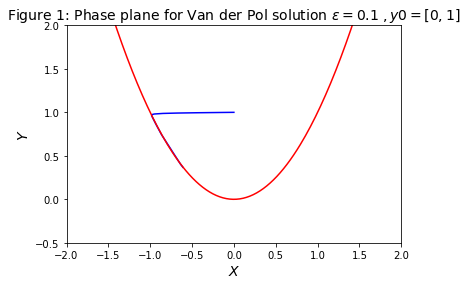

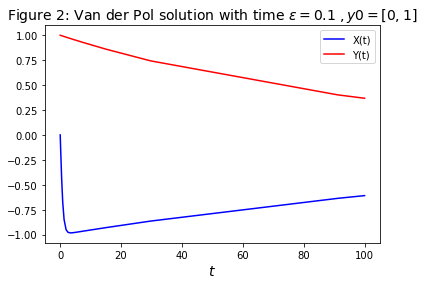

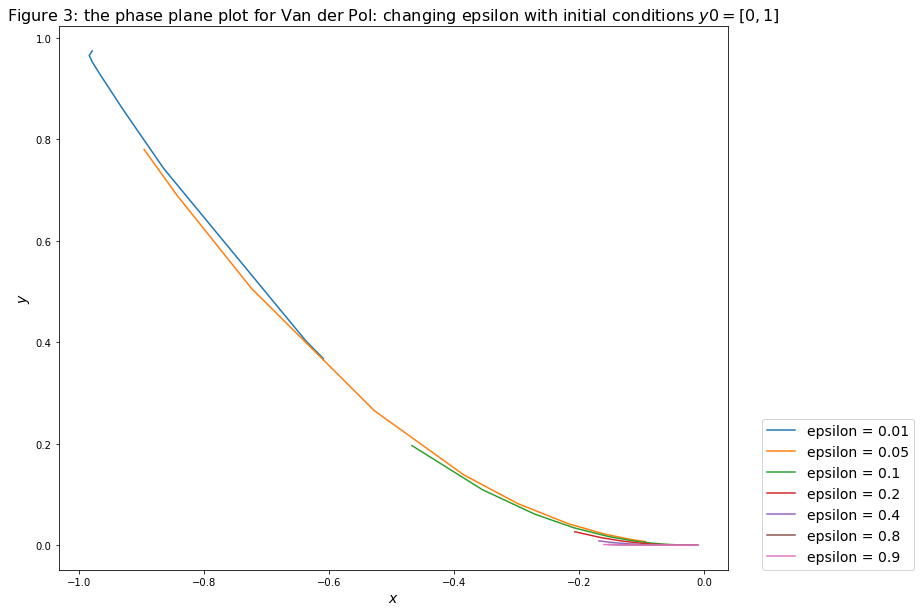

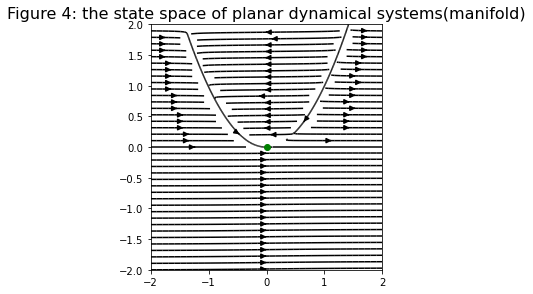

In [2]:
def van_der_pol_1(T,X,e):     
    x = X[0]
    y = X[1]
    
    x_dt = -y+x**2
    y_dt = -e*y
    return np.array([x_dt,y_dt])

y0 = np.array([0, 1])  # initial values for y
t0 = 0.0     # initial value of t
tf = 100.0    # final value of t

eqs1 = partial(van_der_pol_1, e = 0.01)   
sol_Radau = solve_ivp(eqs1, [t0, tf], y0 ,method ='Radau',dense_output=True)

xp = np.linspace(-2, 2, 200)
yp = xp**2

plt.plot(sol_Radau.y[0],sol_Radau.y[1], 'b-')
plt.plot(xp, yp, 'r')
plt.xlabel(r'$X$',fontsize ='14')
plt.ylabel(r'$Y$',fontsize ='14')
plt.title('Figure 1: Phase plane for Van der Pol solution $\epsilon = 0.1 \;, y0 = [0,1]$',fontsize ='14')
plt.xlim([-2,2])
plt.ylim([-0.5,2])
plt.show()


plt.plot(sol_Radau.t, sol_Radau.y[0], 'b-', label='X(t)')
plt.plot(sol_Radau.t, sol_Radau.y[1], 'r-', label='Y(t)')
plt.xlabel(r'$t$', fontsize ='14')
plt.title(r'Figure 2: Van der Pol solution with time $\epsilon = 0.1 \;, y0 = [0,1]$',fontsize ='14')
plt.legend()
plt.show()


evals = [0.01,0.05,0.1,0.2,0.4,0.8,0.9,1.0] # list of values of epsilon
y0 =np.array([0,1]) # initial values for y of [0,1]
plt.figure(figsize=(12,10))  

for i in range(0,7):
    eqs3 = partial(van_der_pol_1, e = evals[i])
    sol_Radau = solve_ivp(eqs3, [t0, tf], y0 , method ='Radau',dense_output=True) #solve with Radau and t0=0, tf= 50
    y1 = sol_Radau.y[0]
    y2 = sol_Radau.y[1]
    ystart = int(len(y1)/2) # start from this index in the plots
    plt.plot(y1[ystart:],y2[ystart:],label = 'epsilon = %s' % evals[i])
   
plt.xlabel(r'$x$', fontsize ='14')
plt.ylabel(r'$y$',fontsize ='14')
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0, fontsize = '14')
plt.title('Figure 3: the phase plane plot for Van der Pol: changing epsilon with initial conditions $y0 = [0,1]$',fontsize ='16')
plt.show()


# python scripts to visualise the state space of planar dynamical systems(manifold)
# plotting range
x = np.linspace(-2, 2, 1001)
y = np.linspace(-2, 2, 1001)
xa, ya = np.meshgrid(x, y)
#the parameters a and epsilon
e=0.01
# specify right hand side of dx/dt = F(x)
F_x = -ya+xa**2
F_y = -e*ya
# add any fixed points (a list of tuples (x*,y*))
fixed_points = [(0,0)] 
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.streamplot(x, y, F_x, F_y, color='k', density=1.3)
for pt in fixed_points:
  ax.plot(pt[0], pt[1], marker='o', c='g')

fig.tight_layout()
plt.title('Figure 4: the state space of planar dynamical systems(manifold)',fontsize ='16')
plt.show()

2.the Van der Pol model as an autonomous ODE system with two components:
\begin{eqnarray*}
\frac{dx}{dt} &=& y-\frac{x^3}{3}+x\\
\frac{dy}{dt} &=&  \epsilon (a-x).
\end{eqnarray*}

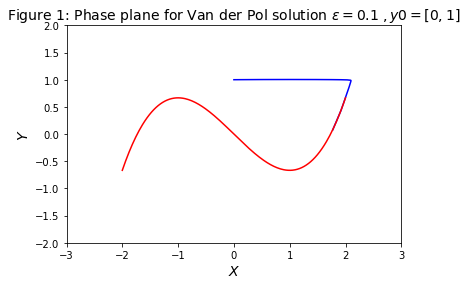

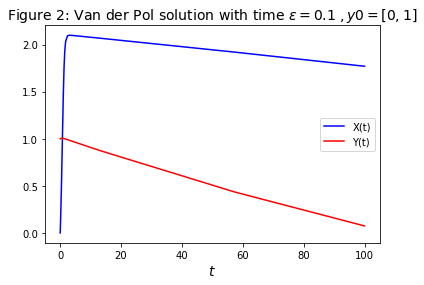

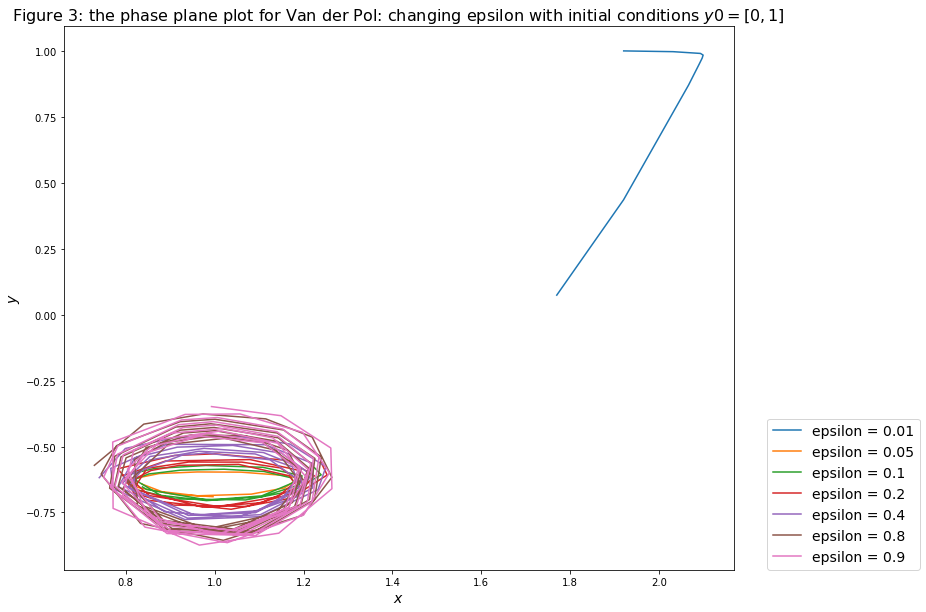

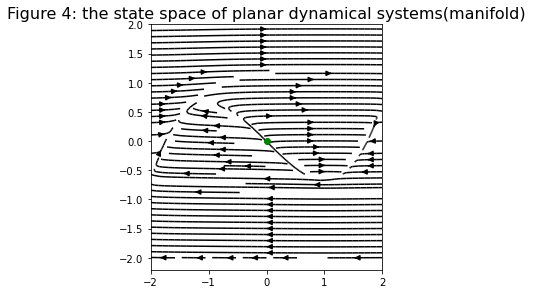

In [3]:
def van_der_pol_2(T,X,e):     
    x = X[0]
    y = X[1]
    
    a=1
    x_dt = y-(x**3)/3+x
    y_dt = e*(a-x)
    return np.array([x_dt,y_dt])

y0 = np.array([0, 1])  # initial values for y
t0 = 0.0     # initial value of t
tf = 100.0    # final value of t

eqs1 = partial(van_der_pol_2, e = 0.01)   
sol_Radau = solve_ivp(eqs1, [t0, tf], y0 ,method ='Radau',dense_output=True)

xp = np.linspace(-2, 2, 200)
yp = (xp**3)/3 -xp

plt.plot(sol_Radau.y[0],sol_Radau.y[1], 'b-')
plt.plot(xp, yp, 'r')
plt.xlabel(r'$X$',fontsize ='14')
plt.ylabel(r'$Y$',fontsize ='14')
plt.title('Figure 1: Phase plane for Van der Pol solution $\epsilon = 0.1 \;, y0 = [0,1]$',fontsize ='14')
plt.xlim([-3,3])
plt.ylim([-2,2])
plt.show()


plt.plot(sol_Radau.t, sol_Radau.y[0], 'b-', label='X(t)')
plt.plot(sol_Radau.t, sol_Radau.y[1], 'r-', label='Y(t)')
plt.xlabel(r'$t$', fontsize ='14')
plt.title(r'Figure 2: Van der Pol solution with time $\epsilon = 0.1 \;, y0 = [0,1]$',fontsize ='14')
plt.legend()
plt.show()


evals = [0.01,0.05,0.1,0.2,0.4,0.8,0.9,1.0] # list of values of epsilon
y0 =np.array([0,1]) # initial values for y of [0,1]
plt.figure(figsize=(12,10))  

for i in range(0,7):
    eqs3 = partial(van_der_pol_2, e = evals[i])
    sol_Radau = solve_ivp(eqs3, [t0, tf], y0 , method ='Radau',dense_output=True) #solve with Radau and t0=0, tf= 50
    y1 = sol_Radau.y[0]
    y2 = sol_Radau.y[1]
    ystart = int(len(y1)/2) # start from this index in the plots
    plt.plot(y1[ystart:],y2[ystart:],label = 'epsilon = %s' % evals[i])
   
plt.xlabel(r'$x$', fontsize ='14')
plt.ylabel(r'$y$',fontsize ='14')
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0, fontsize = '14')
plt.title('Figure 3: the phase plane plot for Van der Pol: changing epsilon with initial conditions $y0 = [0,1]$',fontsize ='16')
plt.show()


# python scripts to visualise the state space of planar dynamical systems(manifold)
# plotting range
x = np.linspace(-2, 2, 1001)
y = np.linspace(-2, 2, 1001)
xa, ya = np.meshgrid(x, y)
#the parameters a and epsilon
e=0.01
# specify right hand side of dx/dt = F(x)
a=1
F_x = ya-(xa**3)/3+xa
F_y = e*(a-xa)
# add any fixed points (a list of tuples (x*,y*))
fixed_points = [(0,0)] 
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.streamplot(x, y, F_x, F_y, color='k', density=1.3)
for pt in fixed_points:
  ax.plot(pt[0], pt[1], marker='o', c='g')

fig.tight_layout()
plt.title('Figure 4: the state space of planar dynamical systems(manifold)',fontsize ='16')
plt.show()

 ## Mathematic Model of circadian rhythm dynamic model
the Process C of the three-process model based on the CBT circadian rhythm dynamic model:
 
 \begin{eqnarray*}
\frac{dn}{dt} &=& 60(\alpha_0 (\frac{I}{I_0})^p (1 - \beta) (1 - n) - \gamma  n)\\
u&=&G \alpha_0 (\frac{I}{I_0})^p (1 - \beta) (1 - n)\\
\frac{dx}{dt} &=&  \frac{\pi}{12}[(x_c + \mu  (\frac{x}{3} + \frac{4}{3}x^3 - \frac{256}{105} x^7 ) + (1 - 0.4 x) (1 - k_c * x_c) u) ]\\
\frac{dx_c}{dt} &=&  \frac{\pi}{12}[(q x_c (1 - 0.4 x) (1 - k_c x_c)  u - (\frac{24}{ 0.99729 \tau_x})^2  x - k_x (1 - 0.4 x) (1 - k_c x_c) u)] .
\end{eqnarray*}


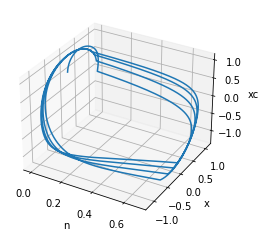

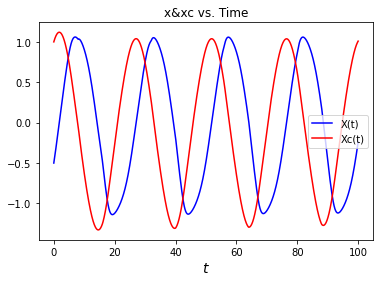

In [4]:
# define 3 dimensional Van der Pol equation
def CR(state, t):
    n, x, xc = state
    a0 = 0.05;g = 0.0075;I0 = 9500;p = 0.5;mu = 0.13;q = 1/3;tx = 24.2;k = 0.55;kc = 0.4;G=33.75
    
    # the piecewise function for light I(t)
    if t % 24 < 16:I = 1000
    else:I = 0
    #the piecewise function for the sleep state B(t)
    if t % 24 <8:b=1
    else:b=0
    
    dn_dt = 60 * (a0 * (I / I0)**p * (1 - b) * (1 - n) - g * n)
    u = G * a0 * (I / I0)**p * (1 - b) * (1 - n)
    dx_dt = np.pi / 12 * (xc + mu * (x / 3 + 4 * x**3 / 3 - 256 * x**7 / 105) + (1 - 0.4 * x) * (1 - kc * xc) * u)
    dxc_dt = np.pi / 12 * (q * xc * (1 - 0.4 * x) * (1 - kc * xc) * u - (24 / (0.99729 * tx))**2 * x - k * x * (1 - 0.4 * x) * (1 - kc * xc) * u)
    
    return [dn_dt, dx_dt, dxc_dt]

# define parameters
t_start = 0  # initial time
t_end = 100  # end time
dt = 0.01  # stepsize

# initial condtions
n0 = 0.1
x0 = -0.5
xc0 = 1
initial_state = [n0, x0, xc0]

# simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)
states = odeint(CR, initial_state, t)
n_simulated = states[:, 0]
x_simulated = states[:, 1]
xc_simulated = states[:, 2]

# plot the 3d trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(n_simulated, x_simulated, xc_simulated)
ax.set_xlabel('n')
ax.set_ylabel('x')
ax.set_zlabel('xc')
plt.show()

# plot t vs x&xc
plt.plot(t, x_simulated, 'b-', label='X(t)')
plt.plot(t, xc_simulated, 'r-', label='Xc(t)')
plt.xlabel(r'$t$', fontsize ='14')
plt.title("x&xc vs. Time")
plt.legend()
plt.show()


### different region
Average sunrise and sunset times in summer for four parts of the UK (England, Scotland, Wales, Northern Ireland). We selected the capitals of each part as representatives.

England (London) Sunrise and sunset times are 5am and 9:30pm.

Scotland (Edinburgh) sunrise and sunset times are 5am and 10:30pm.

Wales (Cardiff) sunrise and sunset times are 5am and 9:30pm.

Northern Ireland (Belfast) sunrise and sunset times are 5am and 10pm.


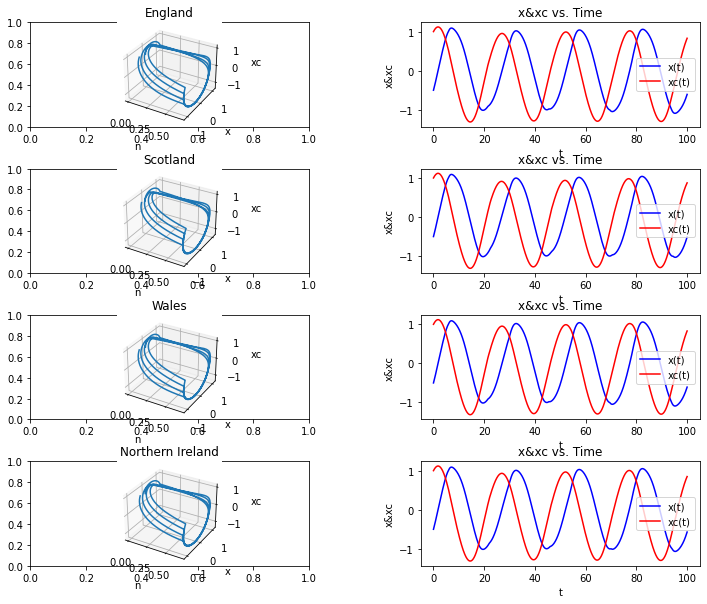

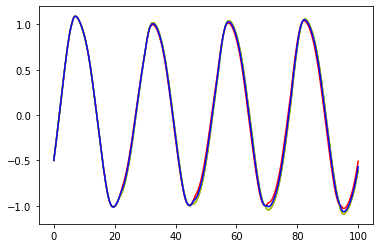

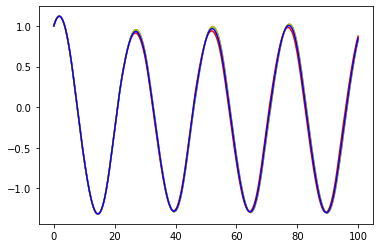

In [5]:
# define 3 dimensional Van der Pol equation
def CR_1(state, t,I0,I1,B0,B1):
    n, x, xc = state
    a0 = 0.05; g = 0.0075; I0 = 9500; p = 0.5; mu = 0.13; q = 1/3; tx = 24.2; k = 0.55; kc = 0.4; G = 33.75
    
    # the piecewise function for light I(t)
    if t % 24 > I0 or t % 24 < I1:
        I = 1000
    else:
        I = 0
    #the piecewise function for the sleep state B(t)
    if t % 24 < B0 or t % 24 > B1:
        b=1
    else:
        b=0
    
    dn_dt = 60 * (a0 * (I / I0)**p * (1 - b) * (1 - n) - g * n)
    u = G * a0 * (I / I0)**p * (1 - b) * (1 - n)
    dx_dt = np.pi / 12 * (xc + mu * (x / 3 + 4 * x**3 / 3 - 256 * x**7 / 105) + (1 - 0.4 * x) * (1 - kc * xc) * u)
    dxc_dt = np.pi / 12 * (q * xc * (1 - 0.4 * x) * (1 - kc * xc) * u - (24 / (0.99729 * tx))**2 * x - k * x * (1 - 0.4 * x) * (1 - kc * xc) * u)
    
    return [dn_dt, dx_dt, dxc_dt]

# define parameters
t_start = 0  # initial time
t_end = 100  # end time
dt = 0.01  # stepsize

# initial condtions
n0 = 0.1
x0 = -0.5
xc0 = 1
initial_state = [n0, x0, xc0]

# simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)
# england adult in summer
extra_args_e = (5, 21.5, 6, 23)
# scotland adult in summer
extra_args_s = (5, 22.5, 6, 23)
# wales adult in summer
extra_args_w = (5, 21.5, 6, 23)
# north ireland adult in summer
extra_args_n = (5, 22, 6, 23)


# England
states_e = odeint(CR_1, initial_state, t, args=extra_args_e)
n_simulated_e = states_e[:, 0]
x_simulated_e = states_e[:, 1]
xc_simulated_e = states_e[:, 2]

# Scotland
states_s = odeint(CR_1, initial_state, t, args=extra_args_s)
n_simulated_s = states_s[:, 0]
x_simulated_s = states_s[:, 1]
xc_simulated_s = states_s[:, 2]

# Wales
states_w = odeint(CR_1, initial_state, t, args=extra_args_w)
n_simulated_w = states_w[:, 0]
x_simulated_w = states_w[:, 1]
xc_simulated_w = states_w[:, 2]

# North Ireland
states_n = odeint(CR_1, initial_state, t, args=extra_args_n)
n_simulated_n = states_n[:, 0]
x_simulated_n = states_n[:, 1]
xc_simulated_n = states_n[:, 2]

fig, axs = plt.subplots(4, 2, figsize=(12, 10))
# England
axs[0, 0] = fig.add_subplot(421, projection='3d')
axs[0, 0].plot(n_simulated_e, x_simulated_e, xc_simulated_e)
axs[0, 0].set_xlabel('n')
axs[0, 0].set_ylabel('x')
axs[0, 0].set_zlabel('xc')
axs[0, 0].set_title('England')

axs[0, 1].plot(t, x_simulated_e, 'b-', label='x(t)')
axs[0, 1].plot(t, xc_simulated_e, 'r-', label='xc(t)')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('x&xc')
axs[0, 1].set_title("x&xc vs. Time")
axs[0, 1].legend()

# Scotland
axs[1, 0] = fig.add_subplot(423, projection='3d')
axs[1, 0].plot(n_simulated_s, x_simulated_s, xc_simulated_s)
axs[1, 0].set_xlabel('n')
axs[1, 0].set_ylabel('x')
axs[1, 0].set_zlabel('xc')
axs[1, 0].set_title('Scotland')

axs[1, 1].plot(t, x_simulated_s, 'b-', label='x(t)')
axs[1, 1].plot(t, xc_simulated_s, 'r-', label='xc(t)')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('x&xc')
axs[1, 1].set_title("x&xc vs. Time")
axs[1, 1].legend()

# Wales
axs[2, 0] = fig.add_subplot(425, projection='3d')
axs[2, 0].plot(n_simulated_w, x_simulated_w, xc_simulated_w)
axs[2, 0].set_xlabel('n')
axs[2, 0].set_ylabel('x')
axs[2, 0].set_zlabel('xc')
axs[2, 0].set_title('Wales')

axs[2, 1].plot(t, x_simulated_w, 'b-', label='x(t)')
axs[2, 1].plot(t, xc_simulated_w, 'r-', label='xc(t)')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('x&xc')
axs[2, 1].set_title("x&xc vs. Time")
axs[2, 1].legend()

# North Ireland
axs[3, 0] = fig.add_subplot(427, projection='3d')
axs[3, 0].plot(n_simulated_n, x_simulated_n, xc_simulated_n)
axs[3, 0].set_xlabel('n')
axs[3, 0].set_ylabel('x')
axs[3, 0].set_zlabel('xc')
axs[3, 0].set_title('Northern Ireland')

axs[3, 1].plot(t, x_simulated_n, 'b-', label='x(t)')
axs[3, 1].plot(t, xc_simulated_n, 'r-', label='xc(t)')
axs[3, 1].set_xlabel('t')
axs[3, 1].set_ylabel('x&xc')
axs[3, 1].set_title("x&xc vs. Time")
axs[3, 1].legend()

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

plt.plot(t, x_simulated_e, 'g-', label='England')
plt.plot(t, x_simulated_s, 'r-', label='Scotland')
plt.plot(t, x_simulated_w, 'y-', label='Wales')
plt.plot(t, x_simulated_n, 'b-', label='North Ireland')
plt.show()

plt.plot(t, xc_simulated_e, 'g-', label='England')
plt.plot(t, xc_simulated_s, 'r-', label='Scotland')
plt.plot(t, xc_simulated_w, 'y-', label='Wales')
plt.plot(t, xc_simulated_n, 'b-', label='North Ireland')
plt.show()



### different seasons
Average sunrise and sunset times for the four seasons in United Kingdom.

Spring sunrise and sunset times are 6:30am and 7:30pm.

Summer sunrise and sunset times are 5am and 9:30pm.

Autumn sunrise and sunset times are 6:30am and 6:30pm.

Winter sunrise and sunset times are 7:30am and 4pm.

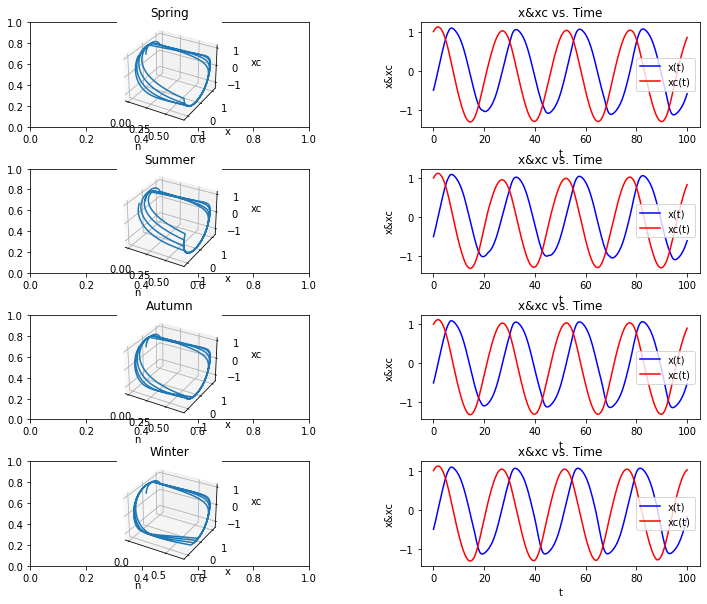

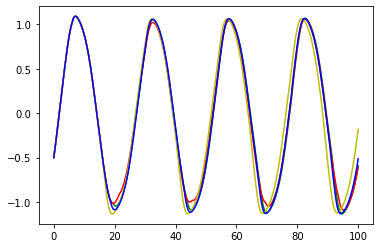

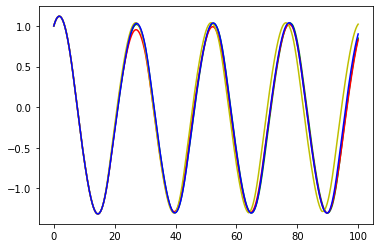

In [6]:
# england adult in spring
extra_args_spr = (6.5, 19.5, 6, 23)
# england adult in summer
extra_args_sum = (5, 21.5, 6, 23)
# england adult in autumn
extra_args_aut = (6.5, 18.5, 6, 23)
# england adult in winter
extra_args_win = (7.5, 16, 6, 23)

# spring
states_spr = odeint(CR_1, initial_state, t, args=extra_args_spr)
n_simulated_spr = states_spr[:, 0]
x_simulated_spr = states_spr[:, 1]
xc_simulated_spr = states_spr[:, 2]

# summer
states_sum = odeint(CR_1, initial_state, t, args=extra_args_sum)
n_simulated_sum = states_sum[:, 0]
x_simulated_sum = states_sum[:, 1]
xc_simulated_sum = states_sum[:, 2]

# autumn
states_aut = odeint(CR_1, initial_state, t, args=extra_args_aut)
n_simulated_aut = states_aut[:, 0]
x_simulated_aut = states_aut[:, 1]
xc_simulated_aut = states_aut[:, 2]

# winter
states_win = odeint(CR_1, initial_state, t, args=extra_args_win)
n_simulated_win = states_win[:, 0]
x_simulated_win = states_win[:, 1]
xc_simulated_win = states_win[:, 2]

fig, axs = plt.subplots(4, 2, figsize=(12, 10))
# spring
axs[0, 0] = fig.add_subplot(421, projection='3d')
axs[0, 0].plot(n_simulated_spr, x_simulated_spr, xc_simulated_spr)
axs[0, 0].set_xlabel('n')
axs[0, 0].set_ylabel('x')
axs[0, 0].set_zlabel('xc')
axs[0, 0].set_title('Spring')

axs[0, 1].plot(t, x_simulated_spr, 'b-', label='x(t)')
axs[0, 1].plot(t, xc_simulated_spr, 'r-', label='xc(t)')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('x&xc')
axs[0, 1].set_title("x&xc vs. Time")
axs[0, 1].legend()

# summer
axs[1, 0] = fig.add_subplot(423, projection='3d')
axs[1, 0].plot(n_simulated_sum, x_simulated_sum, xc_simulated_sum)
axs[1, 0].set_xlabel('n')
axs[1, 0].set_ylabel('x')
axs[1, 0].set_zlabel('xc')
axs[1, 0].set_title('Summer')

axs[1, 1].plot(t, x_simulated_sum, 'b-', label='x(t)')
axs[1, 1].plot(t, xc_simulated_sum, 'r-', label='xc(t)')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('x&xc')
axs[1, 1].set_title("x&xc vs. Time")
axs[1, 1].legend()

# autumn
axs[2, 0] = fig.add_subplot(425, projection='3d')
axs[2, 0].plot(n_simulated_aut, x_simulated_aut, xc_simulated_aut)
axs[2, 0].set_xlabel('n')
axs[2, 0].set_ylabel('x')
axs[2, 0].set_zlabel('xc')
axs[2, 0].set_title('Autumn')

axs[2, 1].plot(t, x_simulated_aut, 'b-', label='x(t)')
axs[2, 1].plot(t, xc_simulated_aut, 'r-', label='xc(t)')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('x&xc')
axs[2, 1].set_title("x&xc vs. Time")
axs[2, 1].legend()

# winter
axs[3, 0] = fig.add_subplot(427, projection='3d')
axs[3, 0].plot(n_simulated_win, x_simulated_win, xc_simulated_win)
axs[3, 0].set_xlabel('n')
axs[3, 0].set_ylabel('x')
axs[3, 0].set_zlabel('xc')
axs[3, 0].set_title('Winter')

axs[3, 1].plot(t, x_simulated_win, 'b-', label='x(t)')
axs[3, 1].plot(t, xc_simulated_win, 'r-', label='xc(t)')
axs[3, 1].set_xlabel('t')
axs[3, 1].set_ylabel('x&xc')
axs[3, 1].set_title("x&xc vs. Time")
axs[3, 1].legend()

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

#
plt.plot(t, x_simulated_spr, 'g-', label='Spring')
plt.plot(t, x_simulated_sum, 'r-', label='Summer')
plt.plot(t, x_simulated_win, 'y-', label='Winter')
plt.plot(t, x_simulated_aut, 'b-', label='Autumn')
plt.show()

plt.plot(t, xc_simulated_spr, 'g-', label='Spring')
plt.plot(t, xc_simulated_sum, 'r-', label='Summer')
plt.plot(t, xc_simulated_win, 'y-', label='Winter')
plt.plot(t, xc_simulated_aut, 'b-', label='Autumn')
plt.show()

### different age groups
Average bedtime and wake-up times for four age groups in the UK.

The average time for falling asleep and waking up for young children (3-6 years old) is 7pm and 8am.

The average time for falling asleep and waking up for children (7-12 years old) is 8pm and 7am.

The average time of falling asleep and waking up for teenagers (13-18 years old) is 10pm and 7am.

The average bedtime and wake-up time for adults (18+) is 11pm and 6am.


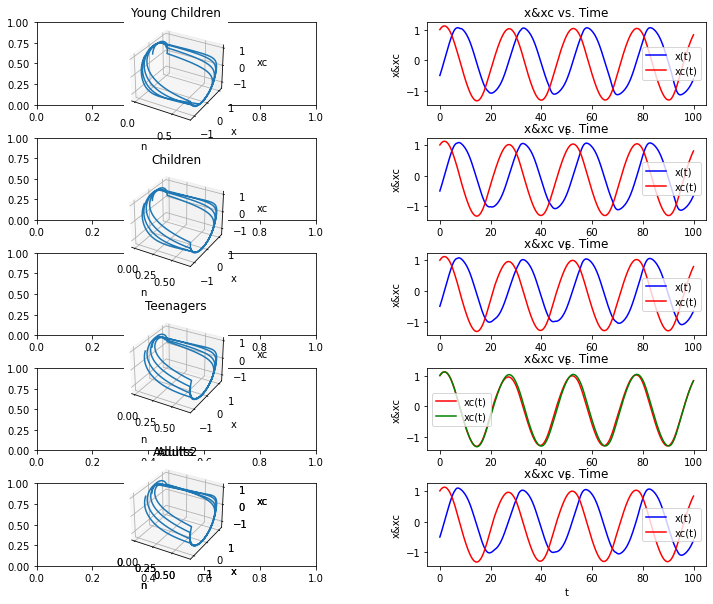

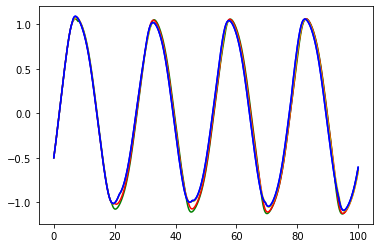

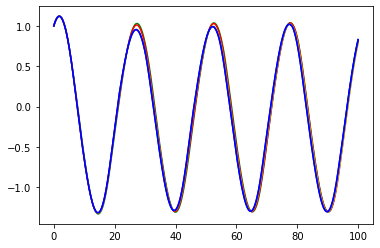

In [7]:
# England young children in summer
extra_args_young = (5, 21.5, 8, 19)
# England children in summer
extra_args_child = (5, 21.5, 7, 20)
# England teenagers in summer
extra_args_teen = (5, 21.5, 7, 22)
# England adults in summer
extra_args_adult = (5, 21.5, 6, 23)

extra_args_adult2 = (5, 21.5,9, 3)

# Young children
states_young = odeint(CR_1, initial_state, t, args=extra_args_young)
n_simulated_young = states_young[:, 0]
x_simulated_young = states_young[:, 1]
xc_simulated_young = states_young[:, 2]

# Children
states_child = odeint(CR_1, initial_state, t, args=extra_args_child)
n_simulated_child = states_child[:, 0]
x_simulated_child = states_child[:, 1]
xc_simulated_child = states_child[:, 2]

# Teenagers
states_teen = odeint(CR_1, initial_state, t, args=extra_args_teen)
n_simulated_teen = states_teen[:, 0]
x_simulated_teen = states_teen[:, 1]
xc_simulated_teen = states_teen[:, 2]

# Adults
states_adult = odeint(CR_1, initial_state, t, args=extra_args_adult)
n_simulated_adult = states_adult[:, 0]
x_simulated_adult = states_adult[:, 1]
xc_simulated_adult = states_adult[:, 2]
#2
states_adult2 = odeint(CR_1, initial_state, t, args=extra_args_adult2)
n_simulated_adult2 = states_adult[:, 0]
x_simulated_adult2 = states_adult[:, 1]
xc_simulated_adult2 = states_adult[:, 2]

fig, axs = plt.subplots(5, 2, figsize=(12, 10))
# Young children
axs[0, 0] = fig.add_subplot(421, projection='3d')
axs[0, 0].plot(n_simulated_young, x_simulated_young, xc_simulated_young)
axs[0, 0].set_xlabel('n')
axs[0, 0].set_ylabel('x')
axs[0, 0].set_zlabel('xc')
axs[0, 0].set_title('Young Children')

axs[0, 1].plot(t, x_simulated_young, 'b-', label='x(t)')
axs[0, 1].plot(t, xc_simulated_young, 'r-', label='xc(t)')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('x&xc')
axs[0, 1].set_title("x&xc vs. Time")
axs[0, 1].legend()

# Children
axs[1, 0] = fig.add_subplot(423, projection='3d')
axs[1, 0].plot(n_simulated_child, x_simulated_child, xc_simulated_child)
axs[1, 0].set_xlabel('n')
axs[1, 0].set_ylabel('x')
axs[1, 0].set_zlabel('xc')
axs[1, 0].set_title('Children')

axs[1, 1].plot(t, x_simulated_child, 'b-', label='x(t)')
axs[1, 1].plot(t, xc_simulated_child, 'r-', label='xc(t)')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('x&xc')
axs[1, 1].set_title("x&xc vs. Time")
axs[1, 1].legend()

# Teenagers
axs[2, 0] = fig.add_subplot(425, projection='3d')
axs[2, 0].plot(n_simulated_teen, x_simulated_teen, xc_simulated_teen)
axs[2, 0].set_xlabel('n')
axs[2, 0].set_ylabel('x')
axs[2, 0].set_zlabel('xc')
axs[2, 0].set_title('Teenagers')

axs[2, 1].plot(t, x_simulated_teen, 'b-', label='x(t)')
axs[2, 1].plot(t, xc_simulated_teen, 'r-', label='xc(t)')
axs[2, 1].set_xlabel('t')
axs[2, 1].set_ylabel('x&xc')
axs[2, 1].set_title("x&xc vs. Time")
axs[2, 1].legend()

# Adults
axs[3, 0] = fig.add_subplot(427, projection='3d')
axs[3, 0].plot(n_simulated_adult, x_simulated_adult, xc_simulated_adult)
axs[3, 0].set_xlabel('n')
axs[3, 0].set_ylabel('x')
axs[3, 0].set_zlabel('xc')
axs[3, 0].set_title('Adults')

#axs[3, 1].plot(t, x_simulated_adult, 'b-', label='x(t)')
axs[3, 1].plot(t, xc_simulated_adult, 'r-', label='xc(t)')
axs[3, 1].plot(t, xc_simulated_young, 'g-', label='xc(t)')
axs[3, 1].set_xlabel('t')
axs[3, 1].set_ylabel('x&xc')
axs[3, 1].set_title("x&xc vs. Time")
axs[3, 1].legend()

# Adults2
axs[4, 0] = fig.add_subplot(427, projection='3d')
axs[4, 0].plot(n_simulated_adult2, x_simulated_adult2, xc_simulated_adult2)
axs[4, 0].set_xlabel('n')
axs[4, 0].set_ylabel('x')
axs[4, 0].set_zlabel('xc')
axs[4, 0].set_title('Adults2')

axs[4, 1].plot(t, x_simulated_adult2, 'b-', label='x(t)')
axs[4, 1].plot(t, xc_simulated_adult2, 'r-', label='xc(t)')
axs[4, 1].set_xlabel('t')
axs[4, 1].set_ylabel('x&xc')
axs[4, 1].set_title("x&xc vs. Time")
axs[4, 1].legend()

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

plt.plot(t, x_simulated_young, 'g-', label='Young')
plt.plot(t, x_simulated_child, 'r-', label='Child')
plt.plot(t, x_simulated_teen, 'y-', label='Teenager')
plt.plot(t, x_simulated_adult, 'b-', label='Adult')
plt.plot(t, x_simulated_adult2, 'b-', label='Adult2')
plt.show()

plt.plot(t, xc_simulated_young, 'g-', label='Young')
plt.plot(t, xc_simulated_child, 'r-', label='Child')
plt.plot(t, xc_simulated_teen, 'y-', label='Teenager')
plt.plot(t, xc_simulated_adult, 'b-', label='Adult')
plt.plot(t, xc_simulated_adult, 'b-', label='Adult2')
plt.show()


## the 3D Van der Pol equation

the Van der Pol model as an autonomous ODE system with three components, (1, 2)-fast–slow system:
\begin{eqnarray*}
\frac{dx}{dt} &=& -y+f_2x^2 +f_3x^3\\
\frac{dy}{dt} &=&  \epsilon(\alpha x +\beta y-z) \\
\frac{dz}{dt} &=&  \epsilon\delta(\mu+\phi(x,y,z)) ,\\
where f_2& =& \frac{3}{|k|},f_3 = \frac{-1}{|k|},\alpha = 1 , \beta = -2, \mu = \frac{k+\lambda+2}{k},\phi(x,y,z)=-y-z.
\end{eqnarray*}
 
We initially fix $\epsilon = 0.01 = \delta$ and $\lambda = 1.5$, and we let $k = -2.2,-3.6,-4.4,-5.4.$

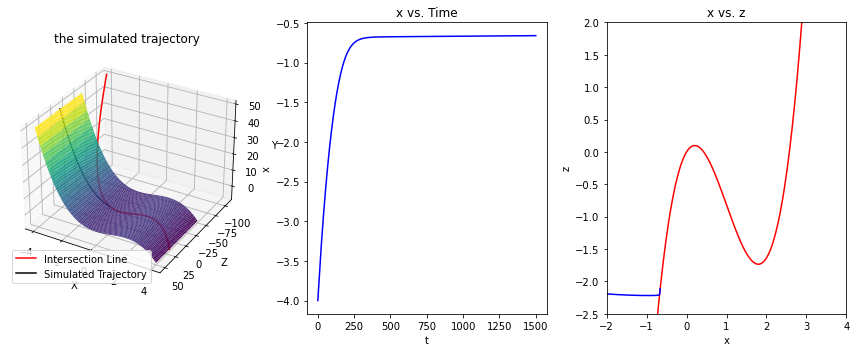

In [8]:
k = -2.2
# Data of the y = 3x^2/|k| -x^3 /|k| surface (M1)
x_range = np.linspace(-4, 4, 100)
z_range = np.linspace(-50, 50, 200)
x_surface, z_surface = np.meshgrid(x_range, z_range)
y_surface = 3 * x_surface**2/abs(k) - x_surface**3 /abs(k)
# Data of the intersection line M2
x_curve = np.linspace(-4, 4, 100)
y_curve = 3 * x_curve**2/abs(k) - x_curve**3 /abs(k)
z_curve = x_curve - 2 * (3 * x_curve**2/abs(k) - x_curve**3 /abs(k))

# Create 3D plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(131, projection='3d')
# Plot the y = x^3 - 3x surface
ax1.plot_surface(x_surface, z_surface, y_surface, cmap='viridis')
# Plot the intersection line
ax1.plot(x_curve, z_curve, y_curve, color='red', label='Intersection Line')

# Define the Van der Pol system
def van_der_pol_3d_1(state, t):
    x, y, z = state
    e = 0.01
    d = 0.01
    l = 1.5
    k = -2.2
    dx_dt = -abs(k)*y + 3*x**2 - x**3 
    dy_dt = e * (x - 2*y - z)
    dz_dt = e * d * ((k+l+2)/k - y - z)
    return [dx_dt, dy_dt, dz_dt]

# Define parameters
t_start = 0  # Initial time
t_end = 1500  # End time
dt = 0.1  # Stepsize
# Initial conditions
x0 = -4
y0 = 50.9
z0 = -2
initial_state = [x0, y0, z0]
# Simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)
states = odeint(van_der_pol_3d_1, initial_state, t)
x_simulated = states[:, 0]
y_simulated = states[:, 1]
z_simulated = states[:, 2]
# Plot the simulated trajectory on the same graph
ax1.plot(x_simulated,   z_simulated,y_simulated, color='black', label='Simulated Trajectory')
# Set labels and title
ax1.set_xlabel('X')
ax1.set_ylabel('Z')
ax1.set_zlabel('Y')
ax1.set_title('the simulated trajectory')
# Add legend
ax1.legend()
ax1.invert_zaxis()
ax1.view_init(elev=-150, azim=-120)

# Plot x vs t
ax2 = fig.add_subplot(132)
ax2.plot(t, x_simulated, 'b-')
ax2.set_xlabel('t')
ax2.set_ylabel('x')
ax2.set_title("x vs. Time")

# Plot x vs z
ax3 = fig.add_subplot(133)
xp = np.linspace(-2, 4, 200)
zp = xp - 2/abs(k) * (3*xp**2 - xp**3)
plt.plot(xp, zp, 'r')
ax3.plot(x_simulated, z_simulated, 'b-')
plt.xlim([-2,4])
plt.ylim([-2.5,2])
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_title("x vs. z")

plt.tight_layout()
plt.show()



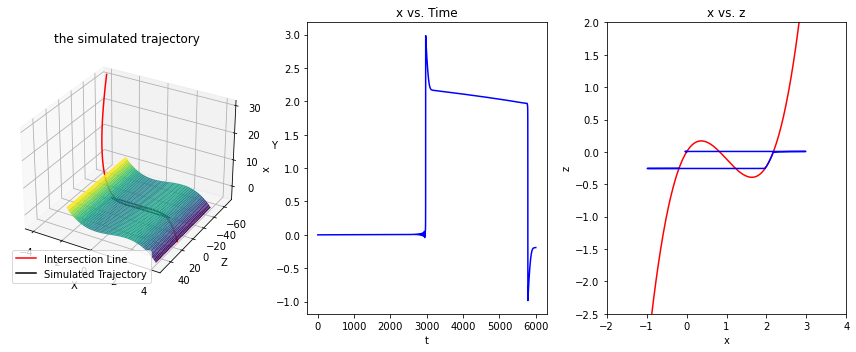

In [9]:
k = -3.6

# Data of the y = 3x^2/|k| -x^3 /|k| surface (M1)
x_range = np.linspace(-2, 4, 100)
z_range = np.linspace(-50, 50, 200)
x_surface, z_surface = np.meshgrid(x_range, z_range)
y_surface = 3 * x_surface**2/abs(k) - x_surface**3 /abs(k)

# Data of the intersection line M2
x_curve = np.linspace(-4, 4, 100)
y_curve = 3 * x_curve**2/abs(k) - x_curve**3 /abs(k)
z_curve = x_curve - 2 * (3 * x_curve**2/abs(k) - x_curve**3 /abs(k))

# Create 3D plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(131, projection='3d')

# Plot the y = x^3 - 3x surface
ax1.plot_surface(x_surface, z_surface, y_surface, cmap='viridis')

# Plot the intersection line
ax1.plot(x_curve, z_curve, y_curve, color='red', label='Intersection Line')

# Define the Van der Pol system
def van_der_pol_3d_2(state, t):
    x, y, z = state
    e = 0.01
    d = 0.01
    l = 1.5
    k = -3.6
    dx_dt = -abs(k)*y + 3*x**2 - x**3 
    dy_dt = e * (x - 2*y - z)
    dz_dt = e * d * ((k+l+2)/k - y - z)
    return [dx_dt, dy_dt, dz_dt]

# Define parameters
t_start = 0  # Initial time
t_end = 6000  # End time
dt = 0.1  # Stepsize

# Initial conditions
x0 = 0
y0 = 0
z0 = 0
initial_state = [x0, y0, z0]

# Simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)
states2 = odeint(van_der_pol_3d_2, initial_state, t)
x_simulated2 = states2[:, 0]
y_simulated2 = states2[:, 1]
z_simulated2 = states2[:, 2]

# Plot the simulated trajectory on the same graph
ax1.plot(x_simulated2, z_simulated2, y_simulated2, color='black', label='Simulated Trajectory')
# Set labels and title
ax1.set_xlabel('X')
ax1.set_ylabel('Z')
ax1.set_zlabel('Y')
ax1.set_title('the simulated trajectory')
# Set axis limits


# Add legend
ax1.legend()
ax1.invert_zaxis()
ax1.view_init(elev=-150, azim=-120)

# Plot x vs t
ax2 = fig.add_subplot(132)
ax2.plot(t, x_simulated2, 'b-')
ax2.set_xlabel('t')
ax2.set_ylabel('x')
ax2.set_title("x vs. Time")

# Plot x vs z
ax3 = fig.add_subplot(133)
xp = np.linspace(-2, 4, 200)
zp = xp - 2/abs(k) * (3*xp**2 - xp**3)
plt.plot(xp, zp, 'r')
ax3.plot(x_simulated2, z_simulated2, 'b-')
plt.xlim([-2,4])
plt.ylim([-2.5,2])
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_title("x vs. z")

plt.tight_layout()
plt.show()

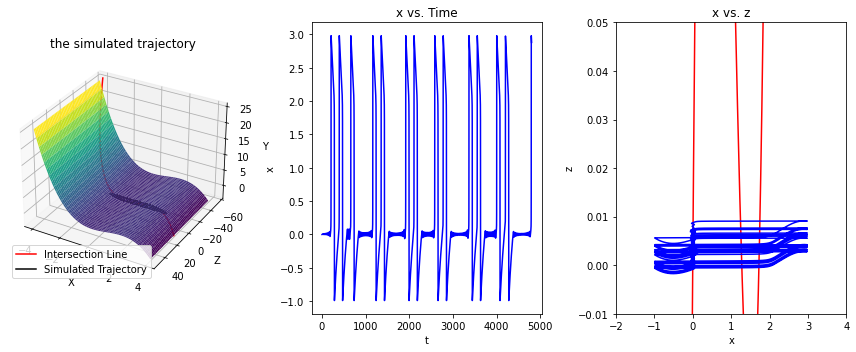

In [10]:
k = -4.4

# Data of the y = 3x^2/|k| -x^3 /|k| surface (M1)
x_range = np.linspace(-4, 4, 100)
z_range = np.linspace(-50, 50, 200)
x_surface, z_surface = np.meshgrid(x_range, z_range)
y_surface = 3 * x_surface**2/abs(k) - x_surface**3 /abs(k)
# Data of the intersection line M2
x_curve = np.linspace(-4, 4, 100)
y_curve = 3 * x_curve**2/abs(k) - x_curve**3 /abs(k)
z_curve = x_curve - 2 * (3 * x_curve**2/abs(k) - x_curve**3 /abs(k))

# Create 3D plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(131, projection='3d')
# Plot the y = x^3 - 3x surface
ax1.plot_surface(x_surface, z_surface, y_surface, cmap='viridis')
# Plot the intersection line
ax1.plot(x_curve, z_curve, y_curve, color='red', label='Intersection Line')

# Define the Van der Pol system
def van_der_pol_3d_3(state, t):
    x, y, z = state
    e = 0.01
    d = 0.01
    l = 1.5
    k = -4.4
    dx_dt = -abs(k)*y + 3*x**2 - x**3 
    dy_dt = e * (x - 2*y - z)
    dz_dt = e * d * ((k+l+2)/k - y - z)
    return [dx_dt, dy_dt, dz_dt]

# Define parameters
t_start = 0  # Initial time
t_end = 4*1200  # End time
dt = 0.1  # Stepsize
# Initial conditions
x0 = 0
y0 = 0
z0 = 0.005
initial_state = [x0, y0, z0]
# Simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)
states3 = odeint(van_der_pol_3d_3, initial_state, t)
x_simulated3 = states3[:, 0]
y_simulated3 = states3[:, 1]
z_simulated3 = states3[:, 2]

# Plot the simulated trajectory on the same graph
ax1.plot(x_simulated3, z_simulated3, y_simulated3, color='black', label='Simulated Trajectory')
# Set labels and title
ax1.set_xlabel('X')
ax1.set_ylabel('Z')
ax1.set_zlabel('Y')
ax1.set_title('the simulated trajectory')

# Add legend
ax1.legend()
ax1.invert_zaxis()
ax1.view_init(elev=-150, azim=-120)

# Plot x vs t
ax2 = fig.add_subplot(132)
ax2.plot(t, x_simulated3, 'b-')
ax2.set_xlabel('t')
ax2.set_ylabel('x')
ax2.set_title("x vs. Time")

# Plot x vs z
ax3 = fig.add_subplot(133)
xp = np.linspace(-2, 4, 200)
zp = xp - 2/abs(k) * (3*xp**2 - xp**3)
plt.plot(xp, zp, 'r')
ax3.plot(x_simulated3, z_simulated3, 'b-')
plt.xlim([-2,4])
plt.ylim([-0.01,0.05])
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_title("x vs. z")

plt.tight_layout()
plt.show()

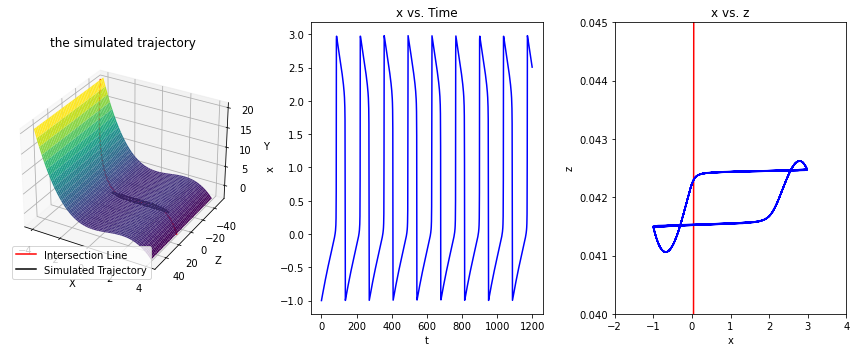

In [11]:
k = -5.4

# Data of the y = 3x^2/|k| -x^3 /|k| surface (M1)
x_range = np.linspace(-4, 4, 100)
z_range = np.linspace(-50, 50, 200)
x_surface, z_surface = np.meshgrid(x_range, z_range)
y_surface = 3 * x_surface**2/abs(k) - x_surface**3 /abs(k)
# Data of the intersection line M2
x_curve = np.linspace(-4, 4, 100)
y_curve = 3 * x_curve**2/abs(k) - x_curve**3 /abs(k)
z_curve = x_curve - 2 * (3 * x_curve**2/abs(k) - x_curve**3 /abs(k))

# Create 3D plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(131, projection='3d')
# Plot the y = x^3 - 3x surface
ax1.plot_surface(x_surface, z_surface, y_surface, cmap='viridis')
# Plot the intersection line
ax1.plot(x_curve, z_curve, y_curve, color='red', label='Intersection Line')

# Define the Van der Pol system
def van_der_pol_3d_4(state, t):
    x, y, z = state
    e = 0.01
    d = 0.01
    l = 1.5
    k = -5.4
    dx_dt = -abs(k)*y + 3*x**2 - x**3 
    dy_dt = e * (x - 2*y - z)
    dz_dt = e * d * ((k+l+2)/k - y - z)
    return [dx_dt, dy_dt, dz_dt]

# Define parameters
t_start = 0  # Initial time
t_end = 1200  # End time
dt = 1  # Stepsize
# Initial conditions
x0 = -1
y0 = 3 * x0**2/abs(k) - x0**3 /abs(k)
z0 = 0.0415
initial_state = [x0, y0, z0]
# Simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)
states4 = odeint(van_der_pol_3d_4, initial_state, t)
x_simulated4 = states4[:, 0]
y_simulated4 = states4[:, 1]
z_simulated4 = states4[:, 2]

# Plot the simulated trajectory on the same graph
ax1.plot(x_simulated4, z_simulated4, y_simulated4, color='black', label='Simulated Trajectory')
# Set labels and title
ax1.set_xlabel('X')
ax1.set_ylabel('Z')
ax1.set_zlabel('Y')
ax1.set_title('the simulated trajectory')

# Add legend
ax1.legend()
ax1.invert_zaxis()
ax1.view_init(elev=-150, azim=-120)

# Plot x vs t
ax2 = fig.add_subplot(132)
ax2.plot(t, x_simulated4, 'b-')
ax2.set_xlabel('t')
ax2.set_ylabel('x')
ax2.set_title("x vs. Time")

# Plot x vs z
ax3 = fig.add_subplot(133)
xp = np.linspace(-2, 4, 200)
zp = xp - 2/abs(k) * (3*xp**2 - xp**3)
plt.plot(xp, zp, 'r')
ax3.plot(x_simulated4, z_simulated4, 'b-')
plt.xlim([-2,4])
plt.ylim([0.040,0.045])
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_title("x vs. z")

plt.tight_layout()
plt.show()

## Coupled Van der Pol Oscillators 
.The model takes the form of a second order ODE for the scalar quantity $x(t)$: 
\begin{equation}
k^2 \frac{d^2x}{dt} +k\mu_x (x^2 -1)\frac{dx}{dt} + \frac{24}{\tau_x} x + k F_{yx} \frac{dy}{dt} =0.\\
k^2 \frac{d^2y}{dt} +k\mu_y (y^2 -1)\frac{dy}{dt} + \frac{24}{\tau_y} y + k F_{xy} \frac{dx}{dt} =0.
\end{equation}
using transformation then we have :
\begin{eqnarray*}
\frac{dx}{dt} &=& p_x\\
\frac{dp_x}{dt} &=&-\frac{\mu_x}{k} (x^2 -1)p_x - \frac{24}{k^2\tau_x} x - \frac{ F_{yx}}{k} \frac{dy}{dt}.\\
\frac{dy}{dt} &=& p_y\\
\frac{dp_y}{dt} &=&-\frac{\mu_y}{k} (y^2 -1)p_y - \frac{24}{k^2\tau_y} y - \frac{ F_{xy}}{k} \frac{dx}{dt}.
\end{eqnarray*}


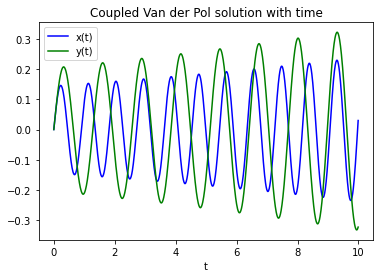

In [14]:
def coupled_vdp_ode(t, state, k, mu_x, mu_y, tau_x, tau_y, F_yx, F_xy):
    x, px, y, py = state

    dx_dt = px
    dpx_dt = -(mu_x / k) * (x**2 - 1) * px - (24 / (k**2 * tau_x)) * x - (F_yx / k) * py
    dy_dt = py
    dpy_dt = -(mu_y / k) * (y**2 - 1) * py - (24 / (k**2 * tau_y)) * y - (F_xy / k) * px

    return [dx_dt, dpx_dt, dy_dt, dpy_dt]

# define parameters tau_x=0.5 and tau_y=1.0
k = 1.0
mu_x = 0.1
mu_y = 0.1
tau_x = 0.5#
tau_y = 1.0#
F_yx = 0.0
F_xy = 0.0
p=1

# define initial conditions
x0 = 0.0
px0 = 1.0
y0 = 0.0
py0 = 1.0
initial_state = [x0, px0, y0, py0]

# define time
t_start = 0.0
t_end = 10.0
dt = 0.01
t = np.arange(t_start, t_end, dt)

# solve ODEs
sol = solve_ivp(lambda t, state: coupled_vdp_ode(t, state, p, mu_x, mu_y, tau_x, tau_y, F_yx, F_xy), [t_start, t_end], initial_state, t_eval=t)
x = sol.y[0]
px = sol.y[1]
y = sol.y[2]
py = sol.y[3]

# Plot the solution
plt.plot(sol.t, x, 'b-', label='x(t)')
plt.plot(sol.t, y, 'g-', label='y(t)')
plt.xlabel('t')
plt.title('Coupled Van der Pol solution with time')
plt.legend()
plt.show()


## Coupled Van der Pol \Oscillators 
.The model takes the form of a second order ODE for the scalar quantity $x(t)$: 
\begin{equation}
k^2 \frac{d^2x}{dt}+\mu (x^2 -1)\frac{dx}{dt} +  x  =0.\\
k^2 \frac{d^2y}{dt} +\mu (y^2 -1)\frac{dy}{dt} +  y + =0.
\end{equation}
using Liénard transformation then we have :
\begin{eqnarray*}
\frac{dx}{dt} &=& x-\frac{x^3}{3} -p_x\\
\frac{dp_x}{dt} &=&\delta x.\\
\frac{dy}{dt} &=& y-\frac{ y^3}{3} -p_y\\
\frac{dp_y}{dt} &=&\delta y .
\end{eqnarray*}


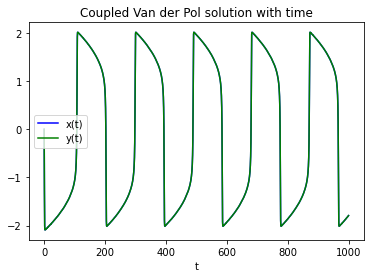

In [15]:
def vdp4(t, state,d):
    x, px, y, py = state

    dx_dt = x-x**3/(3) - px
    dpx_dt = d*x
    dy_dt = y-y**3/(3) - py
    dpy_dt = d*y

    return [dx_dt, dpx_dt, dy_dt, dpy_dt]

# define parameters delta = 0.01
d = 0.01


# define initial conditions
x0 = 0.0
px0 = 1.0
y0 = 0.0
py0 = 1.0
initial_state = [x0, px0, y0, py0]

# define time
t_start = 0.0
t_end = 1000.0
dt = 0.1
t = np.arange(t_start, t_end, dt)

# solve ODEs
sol = solve_ivp(lambda t, state: vdp4(t, state, d), [t_start, t_end], initial_state, t_eval=t)
x = sol.y[0]
px = sol.y[1]
y = sol.y[2]
py = sol.y[3]

# Plot the solution
plt.plot(sol.t, x, 'b-', label='x(t)')
plt.plot(sol.t, y, 'g-', label='y(t)')
plt.xlabel('t')
plt.title('Coupled Van der Pol solution with time')
plt.legend()
plt.show()


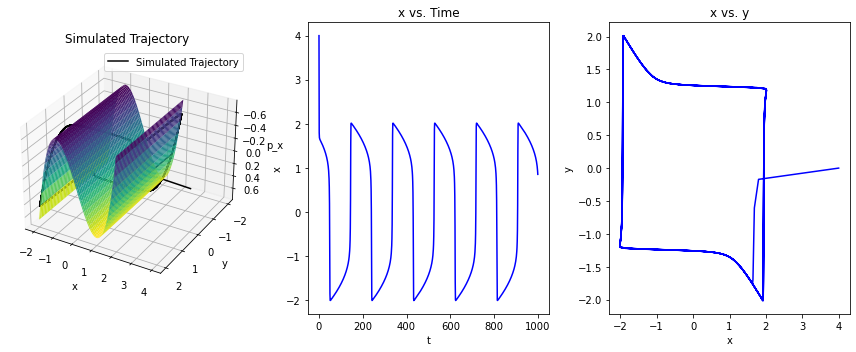

In [16]:
# Define the range of x values
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x_vals, y_vals) 

# Calculate the corresponding p_x values
p_x_vals = x - x**3 / 3
p_y_vals = y - y**3 / 3

# Create a 3D plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(131, projection='3d')
# Plot the surface of M1
ax1.plot_surface(x, y, p_x_vals, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('p_x')
ax1.set_title('Plot of p_x')

def vdp4(t, state,d):
    x, px, y, py = state

    dx_dt = x - x**3 / 3 - px
    dpx_dt = d * x
    dy_dt = y - y**3 / 3 - py
    dpy_dt = d * y

    return [dx_dt, dpx_dt, dy_dt, dpy_dt]

# Define the parameter delta = 0.01
d = 0.01
# Define the initial conditions
x0 = 4.0
px0 = 0.1
y0 = 0.0
py0 = 0.1
initial_state = [x0, px0, y0, py0]
# Define the time
t_start = 0.0
t_end = 1000.0
dt = 1
t = np.arange(t_start, t_end, dt)
# Solve the ODEs
sol = solve_ivp(lambda t, state: vdp4(t, state, d), [t_start, t_end], initial_state, t_eval=t)
x_simulated = sol.y[0]
px_simulated = sol.y[1]
y_simulated = sol.y[2]
py_simulated = sol.y[3]

# Plot the simulated trajectory on the same graph
ax1.plot(x_simulated, y_simulated, px_simulated, color='black', label='Simulated Trajectory')
# Set labels and title
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('p_x')
ax1.set_title('Simulated Trajectory')

# Add legend
ax1.legend()
ax1.view_init(elev=-150, azim=-120)

# Create the second subplot: x vs t
ax2 = fig.add_subplot(132)
ax2.plot(t, x_simulated, 'b-')
ax2.set_xlabel('t')
ax2.set_ylabel('x')
ax2.set_title("x vs. Time")

# Create the third subplot: x vs y
ax3 = fig.add_subplot(133)
ax3.plot(x_simulated, y_simulated, 'b-')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title("x vs. y")

plt.tight_layout()
plt.show()
